In [1]:
%load_ext autoreload
%autoreload 2

from segmentor.document.segment import segment_pdf_page, segment_pdf_image

In [11]:
import pdfplumber

page_idx = 4
with pdfplumber.open("/Users/johnathanchiu/Downloads/s41467-022-29268-7.pdf") as pdf:
    crops = segment_pdf_page(pdf.pages[page_idx], padding=2)

    im = pdf.pages[page_idx].to_image()
    for crop in crops:
        im.draw_rect(crop.page_crop.bbox)

    im.show()

In [12]:
from PIL import Image, ImageDraw

# ifile = "/Users/johnathanchiu/Downloads/PM209/images/Apple_iphone-13-pro-max-07300325A-repair/images/Apple_iphone-13-pro-max-07300325A-repair_00014.jpg"
# ifile = "/Users/johnathanchiu/Downloads/PM209/images/Apple_iphone-13-pro-max-07300325A-repair/images/Apple_iphone-13-pro-max-07300325A-repair_00016.jpg"
ifile = "/Users/johnathanchiu/Downloads/PM209/images/Apple_iphone-13-pro-max-07300325A-repair/images/Apple_iphone-13-pro-max-07300325A-repair_00066.jpg"
# ifile = "/Users/johnathanchiu/Downloads/PM209/images/Apple_iphone-13-pro-max-07300325A-repair/images/Apple_iphone-13-pro-max-07300325A-repair_00071.jpg"
# ifile = "/Users/johnathanchiu/Downloads/PM209/images/toshiba_air conditioner manuals_fa6db8bc-5435-4363-a3e2-e6b85ab5ad6e/images/toshiba_air conditioner manuals_fa6db8bc-5435-4363-a3e2-e6b85ab5ad6e_00008.jpg"
# ifile = "/Users/johnathanchiu/Downloads/PM209/images/toshiba_air conditioner manuals_fa6db8bc-5435-4363-a3e2-e6b85ab5ad6e/images/toshiba_air conditioner manuals_fa6db8bc-5435-4363-a3e2-e6b85ab5ad6e_00022.jpg"
# ifile = "/Users/johnathanchiu/Downloads/PM209/images/toshiba_air conditioner manuals_fa6db8bc-5435-4363-a3e2-e6b85ab5ad6e/images/toshiba_air conditioner manuals_fa6db8bc-5435-4363-a3e2-e6b85ab5ad6e_00024.jpg"
# ifile = "/Users/johnathanchiu/Downloads/PM209/images/sony_speaker_ca7086d3-effb-4230-8f16-26066834c1e3/images/sony_speaker_ca7086d3-effb-4230-8f16-26066834c1e3_00009.jpg"
img = Image.open(ifile)

draw = ImageDraw.Draw(img,  "RGBA")
for crop in segment_pdf_image(img, padding=2):
    draw.rectangle(crop.bounding_box, outline=(255, 0, 0), width=3, fill=(0, 127, 255, 80))

img.show()

In [1]:
import json

with open("instances_minitrain2017.json", "r") as f:
    obj = json.load(f)

obj.keys()

dict_keys(['images', 'info', 'licenses', 'annotations', 'categories'])

In [5]:
obj["images"][0]

{'license': 1,
 'file_name': '000000231538.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000231538.jpg',
 'height': 640,
 'width': 476,
 'date_captured': '2013-11-18 12:00:52',
 'flickr_url': 'http://farm4.staticflickr.com/3142/2804610447_ec49815f83_z.jpg',
 'id': 231538}

In [9]:
obj["annotations"][0]["bbox"]

[314.97, 192.72, 102.11, 366.74]

In [18]:
from PIL import Image, ImageDraw
import requests
from io import BytesIO


def draw_bounding_box(img, bbox):
    # Open the image
    draw = ImageDraw.Draw(img)
    
    # Unpack the bounding box
    x, y, w, h = bbox
    
    # Draw the bounding box
    draw.rectangle([x, y, x + w, y + h], outline="red", width=3)  # Red box with a width of 3


bbox = obj["annotations"][0]["bbox"]
url = obj["images"][0]["coco_url"]
response = requests.get(url)
img = Image.open(BytesIO(response.content))

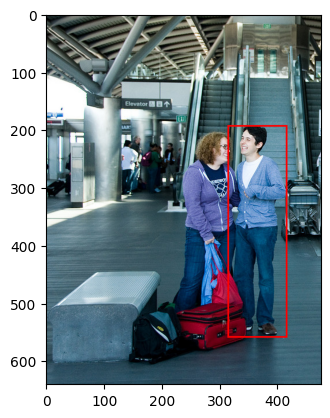

In [19]:
import matplotlib.pyplot as plt

draw_bounding_box(img, bbox)
plt.imshow(img)